In [1]:
import sys
import copy
import rospy
import moveit_commander
import moveit_msgs.msg
import geometry_msgs.msg
import numpy as np

from math import pi
from std_msgs.msg import String
from moveit_commander.conversions import pose_to_list
import tf

%matplotlib notebook

In [2]:
moveit_commander.roscpp_initialize(sys.argv)
rospy.init_node('sample_workspace',anonymous=True)

In [3]:
robot = moveit_commander.RobotCommander()

In [4]:
scene = moveit_commander.PlanningSceneInterface()

In [5]:
robot.get_link_names()

['world',
 'base_link',
 'base',
 'shoulder_link',
 'upper_arm_link',
 'forearm_link',
 'wrist_1_link',
 'wrist_2_link',
 'wrist_3_link',
 'ee_link',
 'tool0']

In [7]:
listener = tf.TransformListener()
(trans,rot) = listener.lookupTransform('world', '/base_link', rospy.Time(0))

In [8]:
print(robot.get_group_names())

['endeffector', 'manipulator']


In [9]:
group = moveit_commander.MoveGroupCommander("manipulator")

In [10]:
group.set_pose_target(group.get_random_pose())
plan1 = group.plan()

In [11]:
def get_random_pose(group):
    pose = group.get_random_pose()
    while (pose.pose.position.z < 0):
        pose = group.get_random_pose()
    quat = [pose.pose.orientation.x,pose.pose.orientation.x,pose.pose.orientation.y,pose.pose.orientation.z,pose.pose.orientation.w]
    return np.hstack((pose.pose.position.x,pose.pose.position.y,pose.pose.position.z, tf.transformations.euler_from_quaternion(quat))) 

In [12]:
poses = np.array([get_random_pose(group) for i in range(50000)])

In [63]:
np.savetxt('sampled_poses.txt',poses)

In [50]:
# Symmetrical location of y-axis rail
cross_y = 1

In [61]:
# Arm base offset on rails - assume symmetrical robot placement
offset_x = 0.5
offset_y = 0.5

<IPython.core.display.Javascript object>


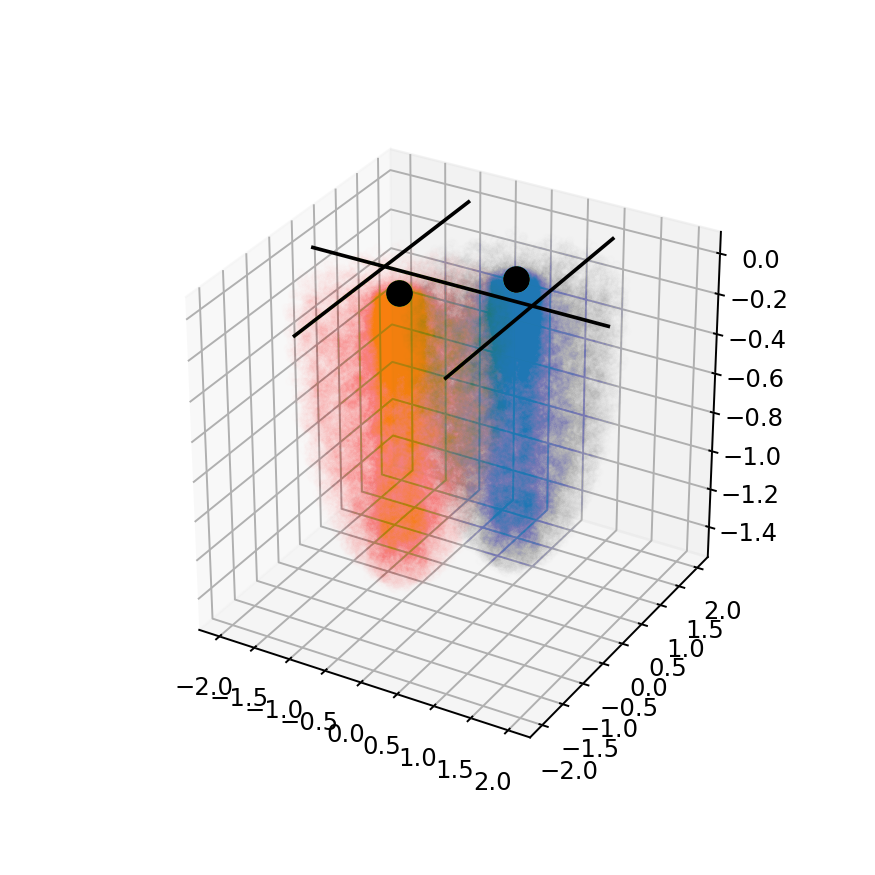

In [64]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot as plt
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection='3d')
ax.plot((-2,2),(0,0),(0,0),'k')
ax.plot((-cross_y,-cross_y),(-2,2),(0,0),'k')
ax.plot((cross_y,cross_y),(-2,2),(0,0),'k')
ax.scatter(poses[:,0]+offset_x, poses[:,1]+offset_y, -poses[:,2],c='C0',alpha=0.005,s=10)
ax.scatter(poses[:,0]-offset_x, poses[:,1]-offset_y, -poses[:,2],c='C1',alpha=0.005,s=10)
ax.scatter(trans[0]+offset_x, trans[1]+offset_y, trans[2],c='k',s=100)
ax.scatter(trans[0]-offset_x, trans[1]-offset_y, trans[2],c='k',s=100)
plt.show()